In [2]:
# Import our libraries we are going to use for our data analysis.
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import HTML
import warnings; warnings.simplefilter('ignore')


% matplotlib inline

df = pd.read_csv("C:/Users/mrferozi/Documents/Panada_ml/loan/lending-club-loan-data/loan_final313.csv",low_memory=False, index_col=0)

# Copy of the dataframe
original_df = df.copy()

import warnings; warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df.dtypes

year                      int64
issue_d                  object
final_d                   int64
emp_length_int          float64
home_ownership           object
home_ownership_cat        int64
income_category          object
annual_inc                int64
income_cat                int64
loan_amount               int64
term                     object
term_cat                  int64
application_type         object
application_type_cat      int64
purpose                  object
purpose_cat               int64
interest_payments        object
interest_payment_cat      int64
loan_condition           object
loan_condition_cat        int64
interest_rate           float64
grade                    object
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
recoveries              float64
installment             float64
region                   object
dtype: object

In [20]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_inc','loan_amount',
                'interest_rate','dti','home_ownership_cat',
               'income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']
X = df[feature_cols]
y = df.loan_condition_cat

In [6]:
# import the relevant class, and instantiate the model (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)

In [7]:
# print the model object to see the default arguments
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [8]:
# use 3-fold cross-validation to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
import numpy as np
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.4007745578178736

In [10]:
# try max_depth=1
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.2567551540318559

In [11]:
# define a range of values
max_depth_range = range(1, 11)

# create an empty list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use cross-validation with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# print the results
RMSE_scores

[0.2567551540318559,
 0.25366522558225996,
 0.2879589511082359,
 0.2863605956073331,
 0.2939229216779917,
 0.30221953585779776,
 0.3180361498736987,
 0.3232884908198002,
 0.34013426134006314,
 0.3558255219584248]

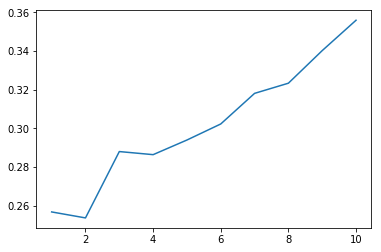

In [12]:
# plot the max_depth (x-axis) versus the RMSE (y-axis)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)

In [13]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [14]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,emp_length_int,0.000000
1,annual_inc,0.000000
2,loan_amount,0.304463
3,interest_rate,0.131929
4,dti,0.000000
5,home_ownership_cat,0.000000
6,income_cat,0.000000
7,total_pymnt,0.307917
8,purpose_cat,0.000000
9,grade_cat,0.000000


In [15]:
## Modeling process
# spilt X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# make predictions on test data
y_pred = treereg.predict(X_test)
y_pred

array([0.19018384, 0.06047039, 0.06047039, ..., 0.06047039, 0.15398012,
       0.19018384])

In [18]:
# calculate RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.25057802209252383

In [19]:
# calculate RMSE for your own tree!
y_test = [3000, 6000, 12000]
y_pred = [3057, 3057, 16333]
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3024.3118776563592

In [21]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_inc','loan_amount',
                'interest_rate','dti','home_ownership_cat',
               'income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']
X = df[feature_cols]
y = df.loan_condition_cat

In [22]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [23]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,emp_length_int,0.000000
1,annual_inc,0.000000
2,loan_amount,0.304463
3,interest_rate,0.131929
4,dti,0.000000
5,home_ownership_cat,0.000000
6,income_cat,0.000000
7,total_pymnt,0.307917
8,purpose_cat,0.000000
9,grade_cat,0.000000
